**Manipulating Images (OpenCV)**

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

**Copying Images**

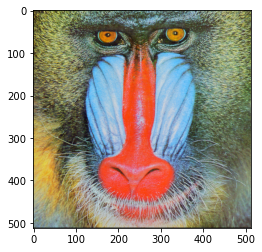

<Figure size 360x360 with 0 Axes>

In [2]:
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(5,5))
plt.show()

In [3]:
A = baboon

In [4]:
id(A) == id(baboon)

True

In [5]:
B = baboon.copy()
id(B) == id(baboon)

False

In [6]:
baboon[:,:,]=0

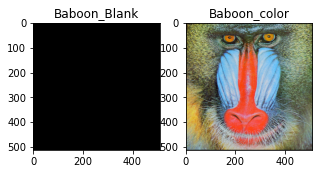

In [7]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title('Baboon_Blank')
plt.subplot(122)
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title('Baboon_color')
plt.show()

**Filling Images**

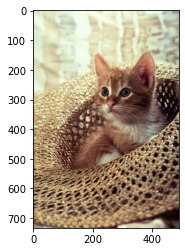

<Figure size 360x360 with 0 Axes>

In [8]:
image = cv2.imread("cat.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(5,5))
plt.show()

We can cast it to an array and find the shape.

In [9]:
width, height, C = image.shape
print('Width, Height, C', width, height, C)

Width, Height, C 733 490 3


In [10]:
array_flip = np.zeros((width, height, C), dtype = np.uint8)

In [11]:
for i,row in enumerate(image):
    array_flip[width-1-i,:,:] = row

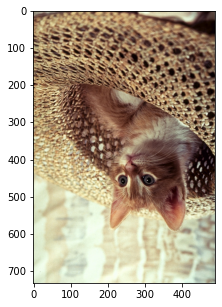

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV has several ways to flip an image, we can use the 'flip()' function, we have the input image array. The parameter is the 'flipCode'

is the value indicating what kind of flip we would like to perform;

flipcode = 0: flip vertically around the x-axis
flipcode > 0: flip horizontally around y-axis positive value
flipcode< 0: flip vertically and horizontally, flipping around both axes negative value
Let apply different flipcode's in a loop:

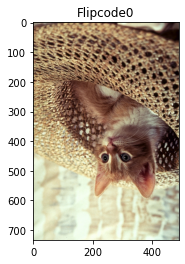

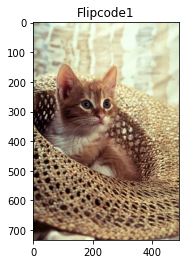

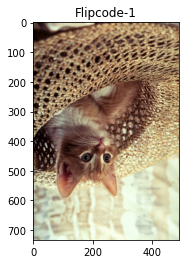

In [13]:
for flipcode in [0, 1, -1]:
    im_flip = cv2.flip(image, flipcode)
    plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
    plt.title("Flipcode" + str(flipcode))
    plt.show()

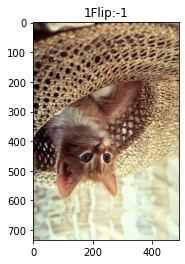

In [14]:
flipcode = -1
im_flip = cv2.flip(image, flipcode)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.title("1Flip:"+str(flipcode))
plt.show()

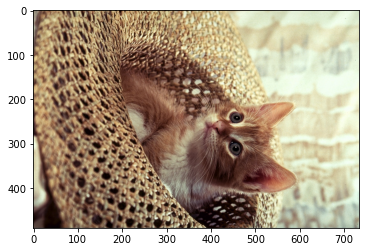

In [15]:
rotate = 0
im_flip = cv2.rotate(image, rotate)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

In [17]:
#flip["ROTATE_90_CLOCKWISE"]

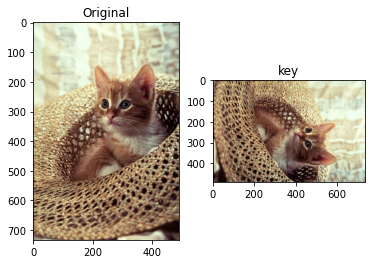

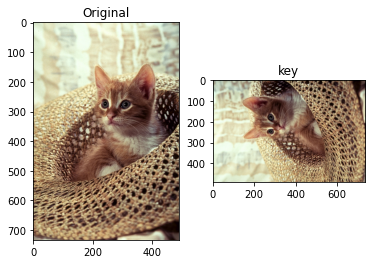

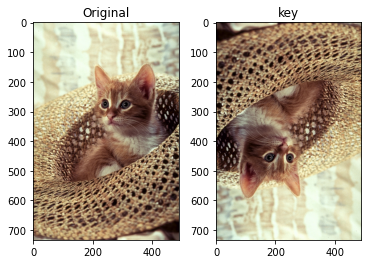

In [18]:
for key, value in flip.items():
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(cv2.rotate(image, value), cv2.COLOR_BGR2RGB))
    plt.title("key")
    plt.show()

**Cropping an Image**    #can be done using array

Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable <code>upper</code> is the first row that we would like to include in the image, the variable <code>lower</code> is the last row we would like to include. We then use slicing to obtain the new image. 


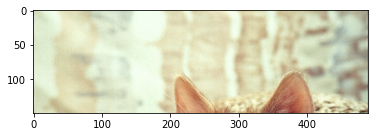

<Figure size 360x360 with 0 Axes>

In [19]:
upper = 50
lower = 200
crop_top = image[upper:lower,:,:]
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(5,5))
plt.show()

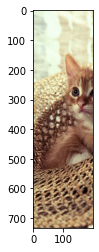

<Figure size 360x360 with 0 Axes>

In [20]:
left = 100
right = 300
crop_horizontal = image[:,left:right,:]
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(5,5))
plt.show()

**Changing Specific Image Pixels** #Also ca be done using array 

In [21]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] = 0

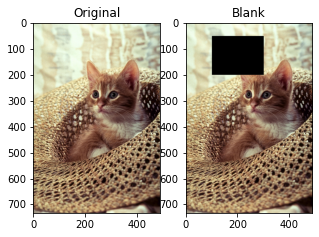

In [22]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(array_sq, cv2.COLOR_BGR2RGB))
plt.title("Blank")
plt.show()

  We can also create shapes and <code>OpenCV</code>, we can use the method <code>rectangle</code>. The parameter  <code>pt1</code> is the top-left coordinate of the rectangle: <code>(left,top)</code> or $(x_0,y_0)$, <code>pt2</code> is the bottom right coordinate<code>(right,lower)</code> or $(x_1,y_1)$. The parameter <code>color</code>  is a tuple representing the intensity of each channel <code>( blue, green, red)</code>. Finally, we have the line thickness.


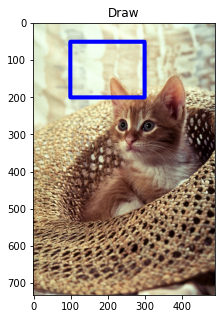

In [23]:
start, end = (left, upper), (right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start, pt2=end, color=(255,0,0), thickness=10)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.title('Draw')
plt.show()

We can overlay text on an image using the function <code>putText</code> with the following parameter values:


 <li><code>img</code>: Image array </li>
<li><code>text</code>: Text string to be overlayed</li>
<li><code>org</code>: Bottom-left corner of the text string in the image</li>
<li><code>fontFace</code>: tye type of font </li>
<li><code>fontScale</code>: Font scale</li>
<li><code>color</code>: Text color</li>
<li><code>thickness</code>: Thickness of the lines used to draw a text</li>
<li><code>lineType:</code> Line type</li>


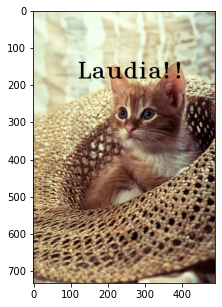

In [26]:
image_draw = cv2.putText(img=image, text='Laudia!', org=(120,180), color=(0,0,0), fontFace=4, fontScale=2, thickness=2)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

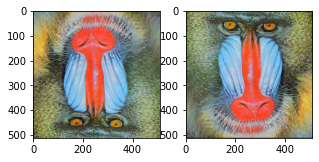

In [30]:
im = cv2.imread("baboon.png")
plt.figure(figsize=(5,5))
plt.subplot(121)
im_flip = cv2.flip(im, 0)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.subplot(122)
im_mirror = cv2.flip(im, 1)
plt.imshow(cv2.cvtColor(im_mirror, cv2.COLOR_BGR2RGB))
plt.show()